# Impacts of the Coronavirus on Various Demographics in Maryland from 04/2020 to 11/2021
Thomas J. Garbe O'Connor
<br>
University of Maryland, College Park - Computer Science
<br>
12/20/2021
## Introduction
The global pandemic caused by the Coronavirus, known as COVID-19, has had numerous profound impacts on people around the world. It has also lead to a large amount of lives lost over the months since the Spring of 2020. Looking at data provided by the state of Maryland in the United States, this project attempts to examine how various groups within Maryland have been affected in terms of deaths caused by COVID-19. 
### Definitions
__Probable Case/Death__ <br>
The CDC provides a definition for ["probable cases"](https://www.cdc.gov/coronavirus/2019-ncov/covid-data/faq-surveillance.html#:~:text=the%20United%20States%3F-,Understanding%20COVID%2D19%20Data,-What%20is%20a), stating:
> A probable case or death is defined as any one of the following:
<br>
• Meets clinical criteria AND epidemiologic linkage with no confirmatory laboratory testing performed for SARS-CoV-2
<br>
• Meets presumptive laboratory evidence
<br>
• Meets vital records criteria with no confirmatory laboratory evidence for SARS-CoV-2
<br>
Any cases and deaths classified as probable are included in CDC case counts. The same applies to any cases and deaths classified as confirmed.

Since probable deaths are included in all CDC counts, they will be included here as well. More information on probable cases can be found at [The COVID Tracking Project](https://covidtracking.com/analysis-updates/how-probable-cases-changed-through-the-covid-19-pandemic#:~:text=for%20false%20positives.-,Probable%20cases,-Probable%20cases%20can).
<br>
__Confirmed Case/Death__ <br>
As stated by [covidtracking.com](https://covidtracking.com/analysis-updates/how-probable-cases-changed-through-the-covid-19-pandemic#:~:text=for%20disease%20surveillance.-,Confirmed%20cases,-Confirmed%20cases%20of), a confirmed case or death occurs when the individual's PCR test returns positive. Confirmed deaths will be examined in addition with probable deaths.
<br>
### About the Data
The data was gathered from the [Open Data Portal](https://opendata.maryland.gov/) provided by the state of Maryland. The following datasets were taken from this source and compiled into one dataset:
<br>

__Probable Death Datasets__<br>
1. [MD COVID-19 - Total Probable Deaths Statewide](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Total-Probable-Deaths-Statewide/raxi-hzpn)
2. [MD COVID-19 - Total Probable Deaths by Date of Death](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Total-Probable-Deaths-by-Date-of-Death/36md-srvk)
3. [MD COVID-19 - Probable Deaths by Gender Distribution](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Probable-Deaths-by-Gender-Distribution/w2wg-xw5p)
4. [MD COVID-19 - Probable Deaths by Race and Ethnicity Distribution](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Probable-Deaths-by-Race-and-Ethnicity-/xtrn-8azc)
5. [MD COVID-19 - Probable Deaths by Age Distribution](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Probable-Deaths-by-Age-Distribution/daz6-3c89)
<br>

__Confirmed Death Datasets__<br>
1. [MD COVID-19 - Total Confirmed Deaths Statewide](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Total-Confirmed-Deaths-Statewide/w9rb-g7zs)
2. [MD COVID-19 - Total Confirmed Deaths by Date of Death](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Total-Confirmed-Deaths-by-Date-of-Deat/65qq-j35q)
3. [MD COVID-19 - Confirmed Deaths by Gender Distribution](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Confirmed-Deaths-by-Gender-Distributio/6wn5-z595)
4. [MD COVID-19 - Confirmed Deaths by Race and Ethnicity Distribution](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Confirmed-Deaths-by-Race-and-Ethnicity/qwhp-7983)
5. [MD COVID-19 - Confirmed Deaths by Age Distribution](https://opendata.maryland.gov/Health-and-Human-Services/MD-COVID-19-Confirmed-Deaths-by-Age-Distribution/ix2d-fenx) 
<br>

These datasets were merged on their date, and rows that consisted of mostly missing values were removed. Rows for December 2021 were also removed due to only a handleful of days being added to the datasets before the [cyberattack on Maryland's Health Department](https://www.cnn.com/2021/12/14/politics/maryland-health-department-hack-covid-19-data/index.html).

## Data Retrieval and Cleaning
Each dataset is read from a CSV file provided through a URL, then converted to an appropriately named DataFrame through use of the Pandas library. Once all of the data is obtained, the datasets are merged together, removing unecessary columns for object ID and renaming columns as necessary to keep a consistent naming convention. Since all of the numeric, non-date, values were imported as floating point numbers they were converted to type integer. Finally, rows missing data are removed, as are the handful of days that came in for December.
<br>
This process is done for datasets referring to probable deaths and datasets referring to confirmed death seperately, but a joint dataset is made at the end.

In [1]:
# Libraries necessary for Python operations:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf

### Probable Death Datasets

In [2]:
# Retrieve data from opendata.maryland.gov
cumulative = pd.read_csv('https://opendata.maryland.gov/resource/raxi-hzpn.csv')
daily = pd.read_csv('https://opendata.maryland.gov/resource/36md-srvk.csv')
gender = pd.read_csv('https://opendata.maryland.gov/resource/w2wg-xw5p.csv')
race = pd.read_csv('https://opendata.maryland.gov/resource/xtrn-8azc.csv')
age = pd.read_csv('https://opendata.maryland.gov/resource/daz6-3c89.csv')

# Merge DataFrames containing cumulative total to date and daily total
pdf = cumulative.merge(daily, how='inner', on='date')
pdf.drop(['objectid_x', 'objectid_y'], axis=1, inplace=True)
pdf.rename(columns={'count_x': 'total', 'count_y': 'dateTotal'}, inplace=True)

# Merge DataFrame containing cumulative gender data
pdf = pdf.merge(gender, how='inner', on='date')
pdf.drop(['objectid'], axis=1, inplace=True)
pdf.rename(columns={'unknown': 'genderUnknown'}, inplace=True)

# Merge DataFrame containing race data
pdf = pdf.merge(race, how='inner', on='date')
pdf.drop(['objectid'], axis=1, inplace=True)
pdf.rename(columns={'not_available': 'raceUnknown'}, inplace=True)

# Merge DataFrame containing age data
pdf = pdf.merge(age, how='inner', on='date')
pdf.drop(['objectid'], axis=1, inplace=True)
pdf.rename(columns={'age_unknown': 'ageUnknown'})

# Convert columns from type float to type int
for col in pdf:
    if col != 'date': # Don't want to attempt to convert datetime column
        pdf[col] = pdf[col].fillna(0.0).astype(int)
        
# Remove time from datetime for readability and to remove unecessary data
pdf['date'] = pd.to_datetime(pdf['date']).dt.date
        
# Remove first two rows which mainly consist of missing data values
# as well as the last few rows containing Decmeber data since the majority of 
# December to present has been unreported due to cyberattacks
pdf.drop([0, 1, 597, 598, 599, 600], axis=0, inplace=True)

In [3]:
pdf.head(5)

,date,total,dateTotal,male,female,genderUnknown,african_american,white,hispanic,asian,...,age_0_to_9,age_10_to_19,age_20_to_29,age_30_to_39,age_40_to_49,age_50_to_59,age_60_to_69,age_70_to_79,age_80plus,age_unknown
2,2020-04-15,64,2,31,33,0,13,34,1,1,...,0,0,0,0,0,3,9,12,26,14
3,2020-04-16,67,0,34,33,0,13,39,0,1,...,0,0,0,0,0,3,9,12,30,13
4,2020-04-17,69,1,34,35,0,16,40,0,1,...,0,0,0,0,0,3,9,13,33,11
5,2020-04-18,71,4,34,37,0,18,40,0,1,...,0,0,0,0,0,4,12,11,33,11
6,2020-04-19,62,1,30,32,0,16,34,0,1,...,0,0,0,0,0,5,10,10,27,10


### Confirmed Death Datasets

In [4]:
# Retrieve data from opendata.maryland.gov
cumulative2 = pd.read_csv('https://opendata.maryland.gov/resource/w9rb-g7zs.csv')
daily2 = pd.read_csv('https://opendata.maryland.gov/resource/65qq-j35q.csv')
gender2 = pd.read_csv('https://opendata.maryland.gov/resource/6wn5-z595.csv')
race2 = pd.read_csv('https://opendata.maryland.gov/resource/qwhp-7983.csv')
age2 = pd.read_csv('https://opendata.maryland.gov/resource/ix2d-fenx.csv')

# Merge DataFrames containing cumulative total to date and daily total
cdf = cumulative2.merge(daily2, how='inner', on='date')
cdf.drop(['objectid_x', 'objectid_y'], axis=1, inplace=True)
cdf.rename(columns={'count_x': 'total', 'count_y': 'dateTotal'}, inplace=True)

# Merge DataFrame containing cumulative gender data
cdf = cdf.merge(gender2, how='inner', on='date')
cdf.drop(['objectid'], axis=1, inplace=True)
cdf.rename(columns={'unknown': 'genderUnknown'}, inplace=True)

# Merge DataFrame containing race data
cdf = cdf.merge(race2, how='inner', on='date')
cdf.drop(['objectid'], axis=1, inplace=True)
cdf.rename(columns={'not_available': 'raceUnknown'}, inplace=True)

# Merge DataFrame containing age data
cdf = cdf.merge(age2, how='inner', on='date')
cdf.drop(['objectid'], axis=1, inplace=True)
cdf.rename(columns={'age_unknown': 'ageUnknown'})

# Convert columns from type float to type int
for col in cdf:
    if col != 'date': # Don't want to attempt to convert datetime column
        cdf[col] = cdf[col].fillna(0.0).astype(int)

# Remove time from datetime for readability and to remove unecessary data
cdf['date'] = pd.to_datetime(cdf['date']).dt.date        

# Remove first two rows which mainly consist of missing data values
# as well as the last few rows containing Decmeber data since the majority of 
# December to present has been unreported due to cyberattacks
cdf.drop([602, 603, 604, 605], axis=0, inplace=True)

In [5]:
cdf.head(5)

,date,total,dateTotal,male,female,genderUnknown,african_american,white,hispanic,asian,...,age_0_to_9,age_10_to_19,age_20_to_29,age_30_to_39,age_40_to_49,age_50_to_59,age_60_to_69,age_70_to_79,age_80plus,age_unknown
0,2020-04-08,124,29,78,46,0,55,39,0,6,...,0,0,0,4,4,16,26,39,35,0
1,2020-04-09,138,29,85,53,0,61,45,0,6,...,0,0,0,4,4,16,28,43,43,0
2,2020-04-10,171,34,102,69,0,77,58,0,6,...,0,0,0,5,5,20,32,51,58,0
3,2020-04-11,206,42,121,85,0,91,72,0,7,...,0,0,1,8,5,22,42,57,71,0
4,2020-04-12,235,31,136,99,0,104,83,0,8,...,0,0,1,9,5,25,51,65,79,0


### Joint Probable Death and Confirmed Death Dataset
A joint DataFrame is created that joins the two previous DataFrames, Probable and Confirmed, so that a total number of deaths can be analyzed. Note that the data for confirmed deaths begins at an earlier point in time, so probable death values for those days are added with zeros, assuming that no probable deaths were recorded for those days. Summations of corresponding columns (e.g. 'female_pdf' and 'female_cdf') make up the new joint dataframe.

In [6]:
# Merge dataframes so NAN values can be treated as 0 during summation
temp_df = pdf.merge(cdf, how='right', on='date', suffixes=('_pdf', '_cdf')).fillna(0)

jdict = {} # Temporarily holds summations before creating a DataFrame
jdict['date'] = temp_df['date']

# Iterate through column pairs, retrieving values from merged DataFrame
for i in range(1, len(pdf.columns)):
    jdict[pdf.columns[i]] = temp_df[pdf.columns[i]+'_pdf'] + temp_df[cdf.columns[i]+'_cdf']
    
jdf = pd.DataFrame(jdict)

In [7]:
jdf.head(5)

,date,total,dateTotal,male,female,genderUnknown,african_american,white,hispanic,asian,...,age_0_to_9,age_10_to_19,age_20_to_29,age_30_to_39,age_40_to_49,age_50_to_59,age_60_to_69,age_70_to_79,age_80plus,age_unknown
0,2020-04-08,124.0,29.0,78.0,46.0,0.0,55.0,39.0,0.0,6.0,...,0.0,0.0,0.0,4.0,4.0,16.0,26.0,39.0,35.0,0.0
1,2020-04-09,138.0,29.0,85.0,53.0,0.0,61.0,45.0,0.0,6.0,...,0.0,0.0,0.0,4.0,4.0,16.0,28.0,43.0,43.0,0.0
2,2020-04-10,171.0,34.0,102.0,69.0,0.0,77.0,58.0,0.0,6.0,...,0.0,0.0,0.0,5.0,5.0,20.0,32.0,51.0,58.0,0.0
3,2020-04-11,206.0,42.0,121.0,85.0,0.0,91.0,72.0,0.0,7.0,...,0.0,0.0,1.0,8.0,5.0,22.0,42.0,57.0,71.0,0.0
4,2020-04-12,235.0,31.0,136.0,99.0,0.0,104.0,83.0,0.0,8.0,...,0.0,0.0,1.0,9.0,5.0,25.0,51.0,65.0,79.0,0.0


## Data Analysis
Now that the data is gathered into managable sets, analysis will be done to hopefully provide some insight regarding deaths recorded for each demographic group provided (i.e gender, race, age). The following graphs will show cumulative deaths within the indicated demographic over time from the joint dataset of both probable and confirmed COVID-19 deaths.
### Gender
'Unknown' is left out of the plot due to it always remaining at zero.

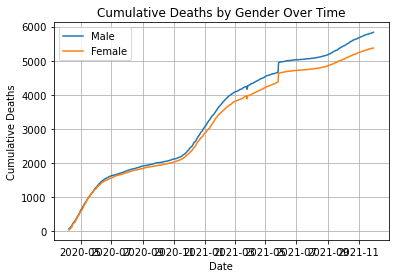

In [8]:
plt.plot(jdf['date'], jdf['male'], label='Male')
plt.plot(jdf['date'], jdf['female'], label='Female')
plt.grid(b=True, which='major', axis='both')
plt.legend(['Male', 'Female'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.title('Cumulative Deaths by Gender Over Time')
plt.show()

### Race

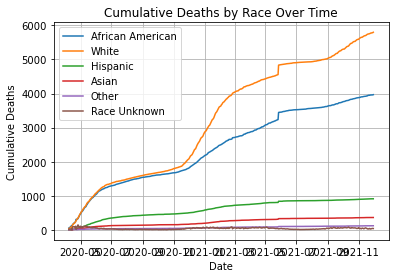

In [9]:
plt.plot(jdf['date'], jdf['african_american'], label='African American')
plt.plot(jdf['date'], jdf['white'], label='White')
plt.plot(jdf['date'], jdf['hispanic'], label='Hispanic')
plt.plot(jdf['date'], jdf['asian'], label='Asian')
plt.plot(jdf['date'], jdf['other'], label='Other')
plt.plot(jdf['date'], jdf['raceUnknown'], label='Race Unknown')
plt.grid(b=True, which='major', axis='both')
plt.legend(['African American', 'White', 'Hispanic', 'Asian', 'Other', 'Race Unknown'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.title('Cumulative Deaths by Race Over Time')
plt.show()

### Age

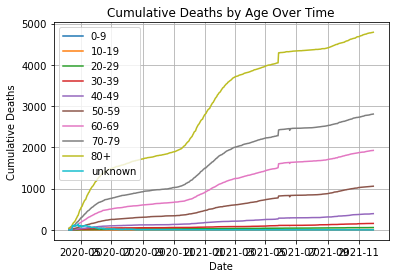

Average age of individuals lost to COVID-19: 73.717307863965


In [10]:
plt.plot(jdf['date'], jdf['age_0_to_9'], label='0-9')
plt.plot(jdf['date'], jdf['age_10_to_19'], label='10-19')
plt.plot(jdf['date'], jdf['age_20_to_29'], label='20-19')
plt.plot(jdf['date'], jdf['age_30_to_39'], label='30-39')
plt.plot(jdf['date'], jdf['age_40_to_49'], label='40-49')
plt.plot(jdf['date'], jdf['age_50_to_59'], label='50-59')
plt.plot(jdf['date'], jdf['age_60_to_69'], label='60-69')
plt.plot(jdf['date'], jdf['age_70_to_79'], label='70-79')
plt.plot(jdf['date'], jdf['age_80plus'], label='80+')
plt.plot(jdf['date'], jdf['age_unknown'], label='age_unknown')
plt.grid(b=True, which='major', axis='both')
plt.legend(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'unknown'], loc='upper left')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths')
plt.title('Cumulative Deaths by Age Over Time')
plt.show()

# Find mean age
ageData = jdf.iloc[-1][12:21]
avrgAge = 5*ageData[0]+15*ageData[1]+25*ageData[2]+35*ageData[3]+45*ageData[4]+55*ageData[5]+65*ageData[6]+ \
          75*ageData[7]+85*ageData[8]
avrgAge = avrgAge/sum(ageData)
print('Average age of individuals lost to COVID-19: ' + str(avrgAge))

## Digging Deeper
Upon initial inspection it appears that older white males are the most common demographic to have died of COVID-19.
<br>
Male deaths do not exceed female deaths by a wide margin, meaning it would be inaccurate to say the vast majority of deaths from COVID-19 are male. While this even split between male and female is somewhat uninsightful, it is worthy of mention that the virus seems to affect men and women evenly. What might be more inisghtful, given more data, is seeing cumulative totals for other gender definitions such as nonbinary, trans-male, and trans-female. While it is not suspected that rate of death varies necessarily by gender alone, these groups might be exposed to higher risk professions or lack the healthcare that would allow them to become either a probable or confirmed case in the eyes of a healthcare facility.
<br>
Furthermore, it seems that the older an individual is, the more likely they are to die from COVID-19 with the '80+' age group making up nearly half of the total deaths. The average age of death was calculated by taking the cumulative counts from November 30th, multiplying them by the middle year of their age group (e.g. 20-29 => 25, 80+ => 85), adding those products together, and dividing by the sum of all cumulative counts (i.e. total cases). The resulting average age of those who lost their life to COVID-19 in Maryland is approximately 73 years.
<br>
The demographic that may need a deeper analysis is race. It seems intuitive that people who identify as White would make up the majority of deaths from COVID-19 because people who identify as White make up the majority of Maryland's population. Looking at [2020 Census Data](https://www.census.gov/quickfacts/MD) reveals that people of White ethnicity make up 50 - 58.5% of Maryland's population whereas the second most prevelant group, Black and/or African American, make up 31.1%. Perhaps taking a look at the number of deaths as a percentage of each ethnicity's indivudual population would provide more insight.
### Organizing Race Data
The percentages given by the Census Bureau will be stored for calculations that describe the percentage of lives lost within a specific race population. Also needed for this calculation is the total population of Maryland which can also be found in the 2020 Census Data.
<br>
The calculation done for each racial group is as follows:
> racePopulation = totalPopulation\*racePercentage
<br>
percentOfPopulation = raceCumulativeDeaths / racePopulation

<br>

Note that the percentage of those who identify as white being used is 50% because this is the value that does not include Hispanic or Latin people. Also note that, per the Census Bureau's website, "Hispanics may be of any race, so also are included in applicable race categories" which may be the reason why the percentages do not add up to 100%.<br>
The 'unknown' category of race provided in the data gathered above will be left out of this analysis due to not having a racial population total to compare it against.

In [11]:
# Store race makeup of population as percent
raceToPercent = {'african_american': .311, 'white': .5, 'hispanic': .106, 'asian': .067, 'other': .036}
raceToPopulation = {}
totalPopulation = 6177224 # Maryland's total population as of 2020 census

# Calculate total population of each race
for race in raceToPercent.keys():
    raceToPopulation[race] = totalPopulation*raceToPercent[race]
    
# Calculate deaths as a percentage of population and create new dataframe
raceToPercentOfPop = {'african_americanPercent': [], 'whitePercent': [], 'hispanicPercent': [], 
                      'asianPercent': [], 'otherPercent': []}

for i in range(len(jdf)):
    for race in raceToPopulation.keys():
        curr = jdf.iloc[i][race]
        pop = raceToPopulation[race]
        percentOfPop = float(curr) / pop
        raceToPercentOfPop[str(race)+'Percent'].append(float(percentOfPop))

# Convert dict to DataFrame and add date column
rdf = pd.DataFrame(raceToPercentOfPop)
rdf.insert(loc=0, column='date', value=jdf['date'])

### Visualizing Race Data
Now that the values representing the percentage of race population have been calculated and stored, they can be visualized in a plot, bar chart, and table. Numerical percentages are also given in decimal value.

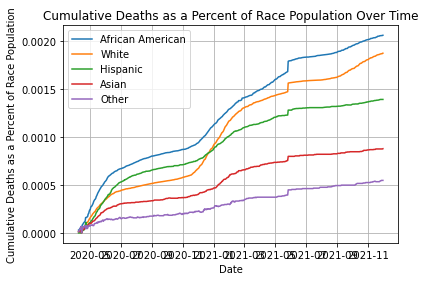

african_americanPercent     0.00206494
whitePercent                0.00187754
hispanicPercent             0.00139435
asianPercent               0.000879495
otherPercent                0.00054861
Name: 601, dtype: object


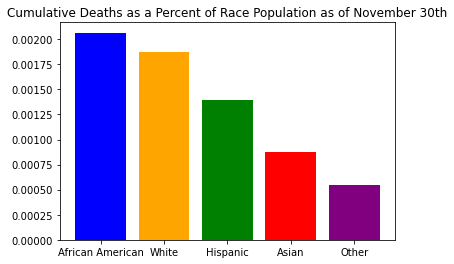

,date,african_americanPercent,whitePercent,hispanicPercent,asianPercent,otherPercent
0,2020-04-08,0.000029,0.000013,0.0,0.000014,0.000013
1,2020-04-09,0.000032,0.000015,0.0,0.000014,0.000022
2,2020-04-10,0.000040,0.000019,0.0,0.000014,0.000031
3,2020-04-11,0.000047,0.000023,0.0,0.000017,0.000040
4,2020-04-12,0.000054,0.000027,0.0,0.000019,0.000054


In [12]:
# For labeling
races = ['African American', 'White', 'Hispanic', 'Asian', 'Other']

# Graph plot
for rp in raceToPercentOfPop.keys():
    plt.plot(rdf['date'], rdf[rp], label='rp')

plt.grid(b=True, which='major', axis='both')
plt.legend(races, loc='upper left')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths as a Percent of Race Population')
plt.title('Cumulative Deaths as a Percent of Race Population Over Time')
plt.show()

# Bar Chart
sizes = rdf.iloc[len(rdf)-1][1:]
print(sizes)

fig1, ax1 = plt.subplots()
ax1.bar(races, sizes, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Cumulative Deaths as a Percent of Race Population as of November 30th')
plt.show()

# Table
rdf.head(5)

### Analyzing Race Data
As is shown in the visualizations above, more of the proportional Black/African American population has died from the Coronavirus than the proportional White population. This suggests that the COVID-19 pandemic has had a more severe impact on Black/African American people in Maryland than other racial groups. Furthermore, it is easier to understand the impact on other groups, such as Hispanic or Latin people, whose percentage conveys a more similar impact to White people than the first graph on race did. Likewise, the impact of the pandemic can be better appreciated for the other racial communities, such as Asians, illustrating a situation that does not diminish their comparitive loss of life.

## Predicting Trends
In an attempt to see how consistent the observed trends are, linear regression models are trained to predict what proportions of cumulative death counts make up each racial demographic. In other words, if the number of cumulative deaths equals 7000, the model must accurately predict how many of those 7000 are Black/African American, White, Hispanic, Asian, Other, or Unknown. A plot is made for each seperate model to increase visual readability.

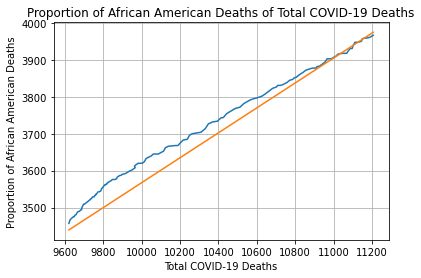

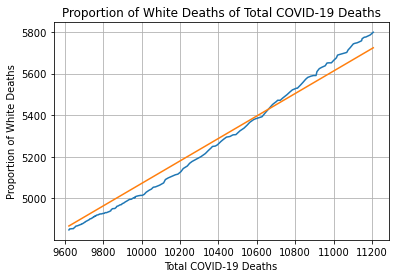

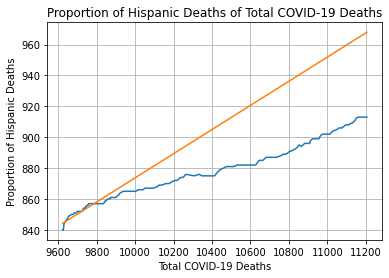

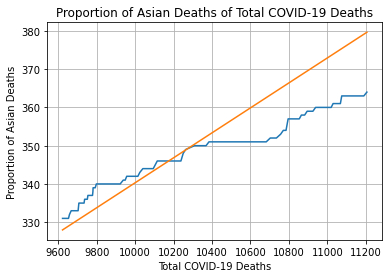

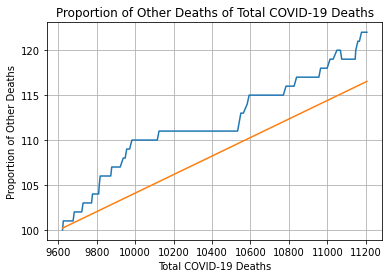

In [13]:
# Do the following for each racial group
for race in raceToPopulation.keys():
    # Initialize training and testing lists
    trainX = []
    trainY = []
    testX = []
    testY = []

    # Create training and testing lists
    for i, r in jdf.iterrows():
        trainX.append(r['total'])
        trainY.append(r[race])
        if i >= 420: # Train on 70% of data and test on 30%
            testX.append(r['total'])
            testY.append(r[race])

    # Train regression model
    npTrainX = np.array(trainX)
    npTrainX = npTrainX.reshape(-1, 1)
    reg = linear_model.LinearRegression()
    reg.fit(npTrainX, trainY)

    fig, ax = plt.subplots()
    npTestX = np.array(testX)
    npTestX = npTestX.reshape(-1, 1)

    # Plot actual proportion with predicted proportion on test data
    plt.plot(testX, testY)
    ax.plot(npTestX, reg.predict(npTestX))
    plt.grid(b=True, which='major', axis='both')
    ax.set_xlabel('Total COVID-19 Deaths')
    ax.set_ylabel('Proportion of {} Deaths'.format(race.replace('_', ' ').title()))
    ax.set_title('Proportion of {} Deaths of Total COVID-19 Deaths'.format(race.replace('_', ' ').title()))
    plt.show()

### Visual Analysis
The models for African American and White racial groups seem to predict future proportions of total deaths fairly well. The third best model appears to be that for the "Other" racial group. Lastly, the models for the Hispanic and Asian groups are somewhat lacking in accuracy. Inaccuracies in each model are speculated to be in part due to dips in the actual data that may signify periods of enforced mask mandates, social distancing, etc, and peaks in the actual data reflecting surges of COVID-19 cases. Additional information from data on hospitalizations and vaccinations may provide further insight to trends in death from COVID-19.
### Numerical Analysis
To understand the consistency of trends in deaths for each racial group numerically, Ordinary Least Squares linear regression will be performed in order to provide insight on statistical significance and proportion of variance for each racial group.

In [14]:
# Do the following for each racial group
for race in raceToPopulation.keys():
    mod = smf.ols(formula='{} ~ total'.format(race), data=jdf)
    res = mod.fit()
    
    print(race.replace('_', ' ').title() + '\n~~~~~~~~~~~~~~~~~~~')
    print(res.summary())
    print('\n\n')

African American
~~~~~~~~~~~~~~~~~~~
                            OLS Regression Results                            
Dep. Variable:       african_american   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.162e+05
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        17:07:29   Log-Likelihood:                -3467.7
No. Observations:                 602   AIC:                             6939.
Df Residuals:                     600   BIC:                             6948.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    18

First, examining the R-Squared values of the OLS linear regression shows that the models fit the data fairly well, with each value being greater than .97 which is therefore close to 1.0. Second, the p-values show statistical significance with values either at or near 0.00, leading to a rejection of the null hypothesis for each. Overall, a consistent trend seems to be predictable for proportional deaths of each racial group within the total number of deaths from COVID-19.

## Conclusion
Through visualization and analysis of the COVID-19 deaths data provided by the state of Maryland, United States, insightful findings have been discovered on the pandemic's impact on different demographics regarding gender, age, and race within Maryland.
<br>
Regarding gender, there is not a significant difference in the number of males dying from COVID-19 compared to females, and providing more gender groups may be somewhat more insightful.
<br>
Among the age groups, the vast majority of deaths are made up by the older population. Most COVID-19 deaths have been suffered by individuals 80 years old or higher, with each younger group by decade exceeding the next. It almost goes without saying that the pandemic has had a severe impact on senior citizens compared to younger age groups.
<br>
Initial findings seemed to suggest that people of White racial background suffered a more severe impact, with Black/African American people making up the second largest portion, and all other racial groups trailing with far smaller portions. However, examining the number of deaths for each race within its own racial population provided more of a perspective, showing not only that the different groups were more similarly impacted than what was initially evident, but also that people of Black/African American racial background are the most severely impacted.
<br>
Linear regression models are able to predict these trends, with error possibly due to surges in cases and/or mask mandates, conveying the consistency of these findings. Adding data on vaccination rates, hospitalizations, and possibly even individual economic status would likely provide even more information on who is effected by deaths from COVID-19. Understanding data such as this helps conceptualize the additional measures that may need to be taken to care for certain groups. It is clear that no one is safe from this pandemic, and all demographic groups analyzed here are severely impacted by the virus. However, groups that are sustaining more deaths than others need to be recogonized so their situations can be addressed.